In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy
import matplotlib.animation as animation
import os

import imageio.v2 as imageio
from IPython.display import display, Image
from IPython.display import HTML
import math
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D
import base64

from astroquery.ipac.nexsci.nasa_exoplanet_archive import NasaExoplanetArchive
import random

import astropy.units as u

import shutil

In [21]:
grav_constant = 6.67e-11 #Nm^2/kg^2
sun_radius = 7e8 #m
sun_mass = 2e30 #kg
earth_radius = 6.38e6 #m
earth_mass = 6e24 #kg
earth_orbital_radius = 1.5e11 #m
earth_orbital_velocity = 2.98e4 #m/s
mars_orbital_radius = 2.08e11 #m
mars_orbital_velocity = 2.4e4 #m/s
mars_mass = 6.4e23 #kg

#ratio of a given planet radius to a given star radius
def planet_star_ratio(star_radius, planet_radius):
    ratio = planet_radius/star_radius
    return ratio

#ratio of earth radius to sun radius
e_s_ratio = planet_star_ratio(sun_radius, earth_radius)

#calculates the orbital period in days of Earth around a given star 
def orbital_period(star_mass):
    earth_orbit = int((2*np.pi*np.sqrt((earth_orbital_radius**3)/(grav_constant*(star_mass+earth_mass))))*1.1557e-5)
    return earth_orbit

#x,y,z position of bodies are arrays
#position_1 = np.array([1,2,3]) for example
#position_2 = np.array([5,6,7])

#break force into x,y,z components then make an array
def gravitational_force(mass_1, mass_2, position_1, position_2):
    position_difference = position_2 - position_1
    r = np.linalg.norm(position_difference)
    force = -grav_constant*(mass_1*mass_2)/r**2
    force_x = force*position_difference[0]/r
    force_y = force*position_difference[1]/r
    force_z = force*position_difference[2]/r
    force_vector = np.array([force_x,force_y,force_z])
    return force_vector

#dt is the timestep
def object_update(mass_1, mass_2, position_1, position_2, velocity_1, velocity_2, dt):
    force = gravitational_force(mass_1, mass_2, position_1, position_2)
    
    #find new velocity 1 and 2 from force
    new_vel_1 = (force/mass_1)*dt + velocity_1
    new_vel_2 = (force/mass_2)*dt + velocity_2 
    
    #find new position 1 and 2 from force
    new_pos_1 = new_vel_1*dt + position_1
    new_pos_2 = new_vel_2*dt + position_2
    
    return new_pos_1, new_vel_1, new_pos_2, new_vel_2

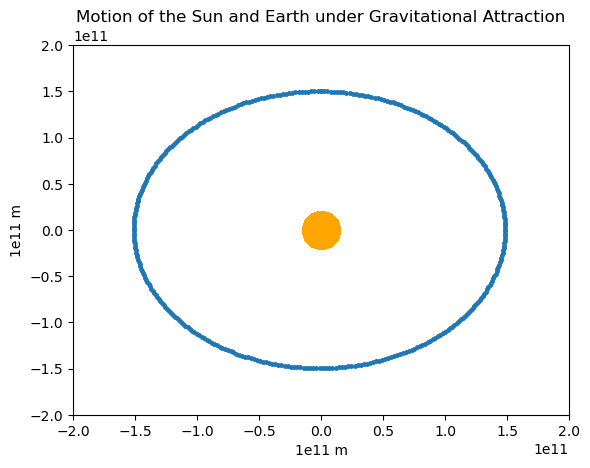

In [4]:
pos_1 = np.array([0,0,0]) #m
vel_1 = np.array([0,0,0]) #m/s
pos_2 = np.array([0,earth_orbital_radius,0]) #m
vel_2 = np.array([earth_orbital_velocity,0,0]) #m/s

object_1_pos = [pos_1]
object_1_vel = [vel_1]
object_2_pos = [pos_2]
object_2_vel = [vel_2]

#seconds in an Earth day
dt = 8.64e4

#the number of timesteps is the value in range()
for i in range(orbital_period(sun_mass)):
    pos_1, vel_1, pos_2, vel_2 = object_update(sun_mass,earth_mass,pos_1,pos_2,vel_1,vel_2,dt)
    object_1_pos.append(pos_1)
    object_2_pos.append(pos_2)
    
x_1 = [object_1_pos[i][0] for i in range(len(object_1_pos))]
y_1 = [object_1_pos[i][1] for i in range(len(object_1_pos))]
z_1 = [object_1_pos[i][2] for i in range(len(object_1_pos))]
x_2 = [object_2_pos[i][0] for i in range(len(object_2_pos))]
y_2 = [object_2_pos[i][1] for i in range(len(object_2_pos))]
z_2 = [object_2_pos[i][2] for i in range(len(object_2_pos))]

plt.scatter(x_1,y_1,s=700,color='orange')
plt.scatter(x_2,y_2,s=700*e_s_ratio)
plt.xlim(-2e11,2e11)
plt.ylim(-2e11,2e11)
plt.title("Motion of the Sun and Earth under Gravitational Attraction")
plt.xlabel('1e11 m')
plt.ylabel('1e11 m')
plt.show()

In [22]:
#make a folder containing the images
image_folder = "orbit_images"
os.makedirs(image_folder, exist_ok=True)

for i in range(len(x_1)):
    plt.scatter(x_1[i],y_1[i],s=700,color='orange')
    plt.scatter(x_2[i],y_2[i],s=700*e_s_ratio)
    plt.xlim(-2e11,2e11)
    plt.ylim(-2e11,2e11)
    plt.title("Motion of the Sun and Earth under Gravitational Attraction")
    plt.xlabel('1e11 m')
    plt.ylabel('1e11 m')
    plt.savefig(f"orbit_images/{i}.png")
    plt.close()

#list all image files in the folder and sort them numerically
image_files = sorted([f for f in os.listdir(image_folder) if f.endswith('.png')], key=lambda x: int(x.split('.')[0]))

#create a list to store the frames of the gif
frames = []

#load each image and append it to the frames list
for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    frame = Image.open(image_path)
    frames.append(frame)

#save the frames as an animated gif
gif_path = "orbit_animation.gif"
frames[0].save(gif_path, save_all=True, append_images=frames[1:], optimize=False, duration=100, loop=0)

#display the GIF
HTML(f'<img src="{gif_path}">')

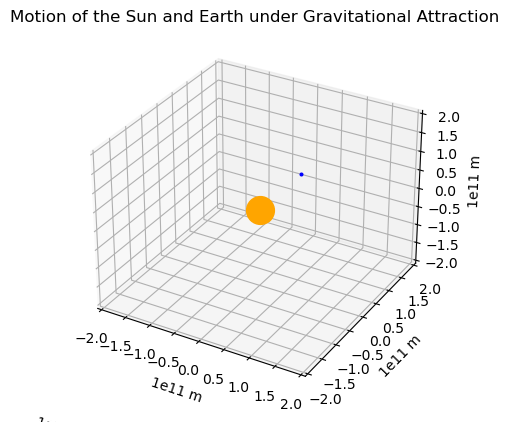

In [6]:
#make a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#make an empty folder to store the frames
frames_folder = "3d_frames"
os.makedirs(frames_folder, exist_ok=True)

# Animate the plot
for i in range(len(x_1)):
    #clear the previous frame
    ax.cla()
    ax.set_xlim([-2e11, 2e11])
    ax.set_ylim([-2e11, 2e11])
    ax.set_zlim([-2e11, 2e11])
    ax.set_xlabel('1e11 m')
    ax.set_ylabel('1e11 m')
    ax.set_zlabel('1e11 m')
    ax.scatter(x_1[i], y_1[i], z_1[i], color='orange', marker='o', s=400)
    ax.scatter(x_2[i], y_2[i], z_2[i], color='blue', marker='o', s=400*e_s_ratio)
    ax.set_title('Motion of the Sun and Earth under Gravitational Attraction')
    frame_path = os.path.join(frames_folder, f"frame_{i:03d}.png")
    plt.savefig(frame_path)
    

#create the animated gif from the saved frames
gif_path_3d = "3d_animation.gif"
with imageio.get_writer(gif_path_3d, mode='I', duration=0.05) as writer:
    for i in range(len(x_1)):
        frame_path = os.path.join(frames_folder, f"frame_{i:03d}.png")
        image = imageio.imread(frame_path)
        writer.append_data(image)

#remove the temporary frame images
for filename in os.listdir(frames_folder):
    file_path = os.path.join(frames_folder, filename)
    os.remove(file_path)

#display the gif
display(HTML(f'<img src="{gif_path_3d}">'))

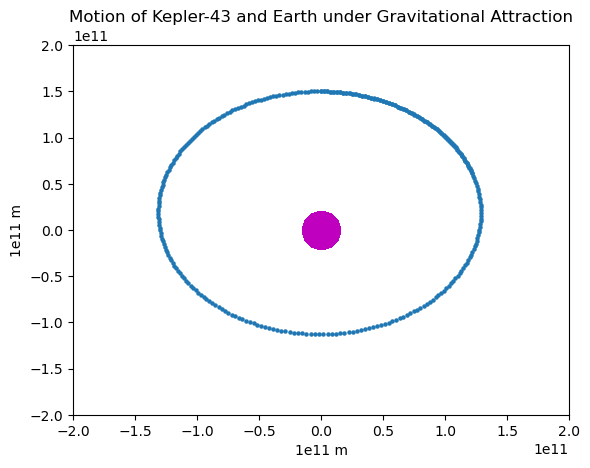

338


In [27]:
#extract star name, mass, and radius from the NASA Exoplanet Archive
stellar_properties_table = NasaExoplanetArchive.query_criteria(table="ps", select="hostname, st_mass, st_rad", cache=True)

# Loop until a star with both radius and mass information is found
while True:
    # Randomly select a star entry from the table
    random_star_entry = random.choice(stellar_properties_table)

    # Check if the selected star has NaN for either radius or mass
    if np.isnan(random_star_entry['st_rad']) or np.isnan(random_star_entry['st_mass']):
        # If either radius or mass is NaN, continue to the next iteration of the loop
        continue
    
    # If both radius and mass are present, extract star properties and break out of the loop
    star_name = random_star_entry['hostname']
    star_radius = random_star_entry['st_rad'].to(u.m).value
    star_mass = random_star_entry['st_mass'].to(u.kg).value
    break

#ratio of the earth radius to a given star radius
radius_ratio = planet_star_ratio(star_radius, earth_radius)

star_pos = np.array([0,0,0]) #m
star_vel = np.array([0,0,0]) #m/s
earth_pos = np.array([0,earth_orbital_radius,0]) #m
earth_vel = np.array([earth_orbital_velocity,0,0]) #m/s

star_positions = [star_pos]
star_velocities = [star_vel]
earth_positions = [earth_pos]
earth_velocities = [earth_vel]

#the number of timesteps is the value in range()
for i in range(orbital_period(star_mass)):
    star_pos, star_vel, earth_pos, earth_vel = object_update(star_mass,earth_mass,star_pos,earth_pos,star_vel,earth_vel,dt)
    star_positions.append(star_pos)
    earth_positions.append(earth_pos)
    
star_x = [star_positions[i][0] for i in range(len(star_positions))]
star_y = [star_positions[i][1] for i in range(len(star_positions))]
star_z = [star_positions[i][2] for i in range(len(star_positions))]
earth_x = [earth_positions[i][0] for i in range(len(earth_positions))]
earth_y = [earth_positions[i][1] for i in range(len(earth_positions))]
earth_z = [earth_positions[i][2] for i in range(len(earth_positions))]

plt.scatter(star_x,star_y,s=700,color='m')
plt.scatter(earth_x,earth_y,s=700*radius_ratio)
plt.xlim(-2e11,2e11)
plt.ylim(-2e11,2e11)
plt.title("Motion of " +star_name+ " and Earth under Gravitational Attraction")
plt.xlabel('1e11 m')
plt.ylabel('1e11 m')
plt.show()

print(orbital_period(star_mass))

In [28]:
#make a folder containing the images and clear files from previous runs
image_folder_2 = 'random_orbit_images'
shutil.rmtree(image_folder_2, ignore_errors=True)
os.makedirs(image_folder_2, exist_ok=True)

for i in range(len(star_x)):
    plt.scatter(star_x[i],star_y[i],s=700,color='m')
    plt.scatter(earth_x[i],earth_y[i],s=700*radius_ratio)
    plt.xlim(-2e11,2e11)
    plt.ylim(-2e11,2e11)
    plt.title("Motion of " +star_name+ " and Earth under Gravitational Attraction")
    plt.xlabel('1e11 m')
    plt.ylabel('1e11 m')
    plt.savefig(f"random_orbit_images/{i}.png")
    plt.close()

#list all image files in the folder and sort them numerically
image_files_2 = sorted([f for f in os.listdir(image_folder_2) if f.endswith('.png')], key=lambda x: int(x.split('.')[0]))

#create a list to store the frames of the gif
frames_2 = []

#load each image and append it to the frames list
for image_file in image_files_2:
    image_path = os.path.join(image_folder_2, image_file)
    frame = Image.open(image_path)
    frames_2.append(frame)

#save the frames as an animated gif
gif_path_random = "random_orbit_animation.gif"
frames_2[0].save(gif_path_random, save_all=True, append_images=frames_2[1:], optimize=False, duration=100, loop=0)

#display the GIF
HTML(f'<img src="{gif_path_random}">')

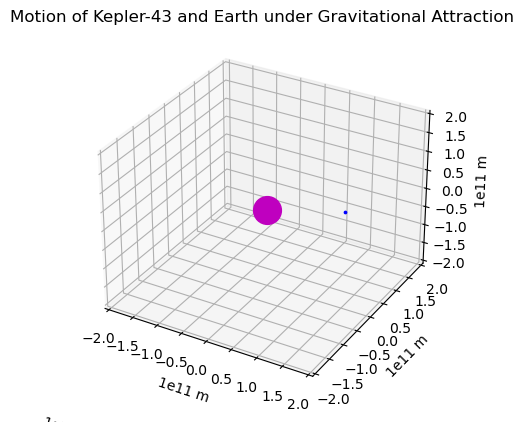

In [29]:
#make a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#make an empty folder to store the frames
frames_folder_random = "random_3d_frames"
shutil.rmtree(frames_folder_random, ignore_errors=True)
os.makedirs(frames_folder_random, exist_ok=True)

# Animate the plot
for i in range(len(star_x)):
    #clear the previous frame
    ax.cla()
    ax.set_xlim([-2e11, 2e11])
    ax.set_ylim([-2e11, 2e11])
    ax.set_zlim([-2e11, 2e11])
    ax.set_xlabel('1e11 m')
    ax.set_ylabel('1e11 m')
    ax.set_zlabel('1e11 m')
    ax.scatter(star_x[i], star_y[i], star_z[i], color='m', marker='o', s=400)
    ax.scatter(earth_x[i], earth_y[i], earth_z[i], color='blue', marker='o', s=400*radius_ratio)
    ax.set_title("Motion of " +star_name+ " and Earth under Gravitational Attraction")
    frame_path = os.path.join(frames_folder_random, f"frame_{i:03d}.png")
    plt.savefig(frame_path)
    

#create the animated gif from the saved frames
gif_path_3d_random = "random_3d_animation.gif"
with imageio.get_writer(gif_path_3d_random, mode='I', duration=0.05) as writer:
    for i in range(len(star_x)):
        frame_path = os.path.join(frames_folder_random, f"frame_{i:03d}.png")
        image = imageio.imread(frame_path)
        writer.append_data(image)

#remove the temporary frame images
for filename in os.listdir(frames_folder_random):
    file_path = os.path.join(frames_folder_random, filename)
    os.remove(file_path)

#display the gif
display(HTML(f'<img src="{gif_path_3d_random}">'))